# Motivation

The purpose of this notebook is to showcase my knowledge on covolutional neural networks applied to image classification and (possibly) object location. 

## Data

- SAR (Synthetics Apperture Radar) satellite data/images of the surface of Venus. The dataset aimes to classify pictures which have volcanoes in them how many there are and where they are in the image. 
- 1 channel
- 110x110 array of pixels with values between 0 and 255.
- 7000 instances
- Labels given:
    - Volcano: 1 or 0
    - Type: 1 = definitely a volcano, 2 = probably, 3 = possibly, 4 = only a pit is visible
    - Radius: in pixels
    - Number Volcanoes: number of volcanoes in the image.
    
## Approach

- The images have around 12000 pixels in them so a dense NN would lose a lot of information if say it had 1000 neurons in the first layer. 
- Instead, I am going to try some small CNN architectures initially just trying to identify volcanoes and then onto more challenging tasks like the number of volcanoes!

## Skills showcased

In this notebook I will show:

- Training a convolutional neural network (CNN) to classify images. 
- Augmenting and preprocessing images before passing to the CNN. 
- Using custom metrics in keras.
- Saving a keras model with custom metrics.
- Load a pretrained model and reuse the layer's weights. 
- Have a CNN trained to return both a classification and additional information (here, number of volcanoes). 

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
# read in training data (can be found here: https://www.kaggle.com/code/behcetsenturk/finding-volcanoes-with-cnn/data)
train_data = pd.read_csv('./train_images.csv', header=None, index_col=False)
train_labels = pd.read_csv('./train_labels.csv', index_col=False)

# read in test data
test_data = pd.read_csv('./test_images.csv', header=None, index_col=False)
test_labels = pd.read_csv('./test_labels.csv', index_col=False)

# scale the data (values in the image are between 0 and 1)
train_data = train_data / 255.0


In [ ]:
# define some parameters of the images
batch_size=64
image_height = 110
image_width = 110
channels = 1

In [3]:
def remove_dodgy_images(array, number_constants):
    
    corrupt = False

    if np.sum(array[:number_constants]) == 0:
        corrupt = True
    else:
        pass

    # sum every 110th pixel
    pixel_sum = 0
    for i in range(0,len(array),110):
        pixel_sum += array[i]
        if i == number_constants:
            break
    if pixel_sum == 0:
        corrupt = True

        
    return corrupt
  
        
# train_df_filtered = pd.DataFrame(data=fine_data, columns = train_data.keys())
# corrupt_data = pd.DataFrame(data=corrupt_data, columns = train_data.keys())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
Fal

False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fa

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
corrupt_data_index = []
fine_data_index = []

corrupt_data = pd.DataFrame()
for i, row in train_data.iterrows():
    
    corrupt = remove_dodgy_images(row.values, number_constants=10)
    print(corrupt)
    if corrupt == True:
        corrupt_data_index.append(i)
    if corrupt == False:
        fine_data_index.append(i)

In [4]:
# separate the corrupt and fine images
train_data_filt = train_data.iloc[fine_data_index]
train_labels_filt = train_labels.iloc[fine_data_index]
corrupt_data_filt = train_data.iloc[corrupt_data_index]
corrupt_labels_filt = train_labels.iloc[corrupt_data_index]


Bad key "text.kerning_factor" on line 4 in
/Users/jamieward/.matplotlib/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key "mathtext.fallback" on line 156 in
/Users/jamieward/.matplotlib/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key "axes.titley" on line 177 in
/Users/jamieward/.matplotlib/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


[ 1.    3.   17.46  1.  ]


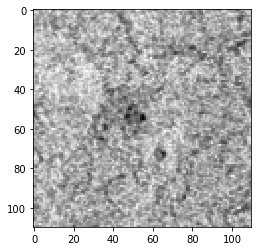

[ 0. nan nan nan]


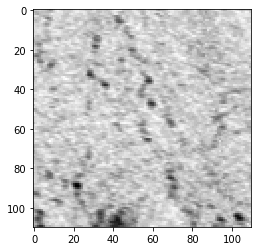

[ 0. nan nan nan]


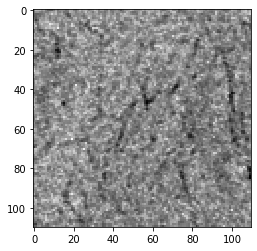

[ 0. nan nan nan]


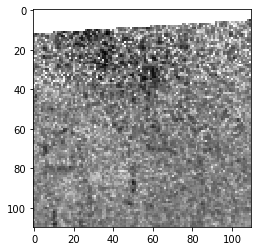

[ 0. nan nan nan]


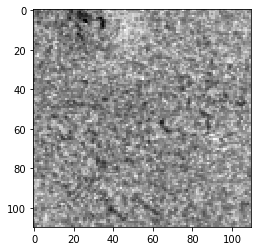

[ 0. nan nan nan]


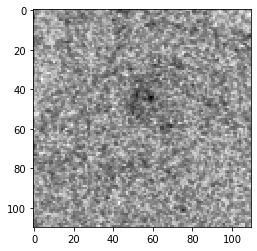

[ 0. nan nan nan]


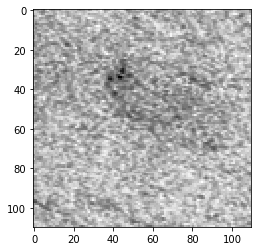

[ 0. nan nan nan]


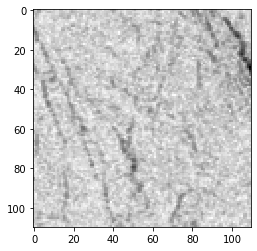

[ 0. nan nan nan]


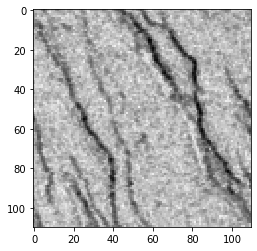

[ 1.    1.   22.02  1.  ]


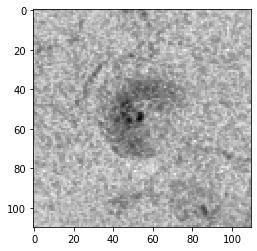

In [5]:

def show_images(data, labels, indexes):
    for i in range(indexes):
        row = data.iloc[i]
        label = labels.iloc[i]
        plt.imshow(np.array(row).reshape((110,110)), cmap='Greys')
        print(np.array(label))
        plt.show()
        
        
show_images(data=train_data_filt, labels=train_labels_filt, indexes=3)

In [7]:
# out of interest, just see how a dense NN would perform

# split into train and valid set
valid_percentage = 0.2

# the data and labels are automatically shuffled with this function. 
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data_filt, 
                                                                      train_labels_filt)

[ 0. nan nan nan]


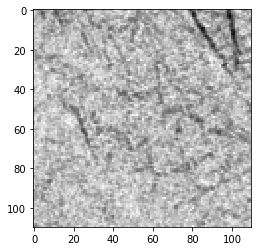

[ 0. nan nan nan]


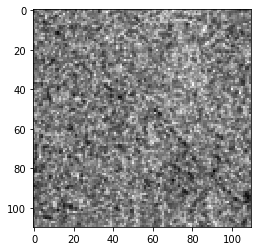

[ 0. nan nan nan]


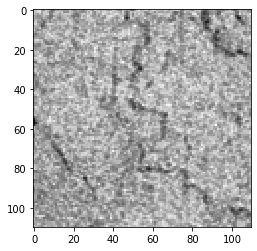

[ 0. nan nan nan]


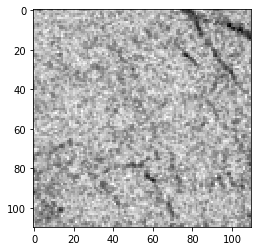

[ 1.    1.   15.81  1.  ]


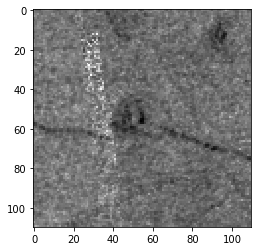

[ 0. nan nan nan]


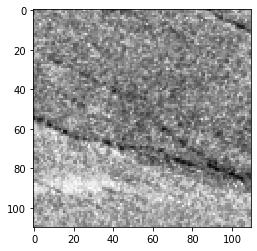

[ 0. nan nan nan]


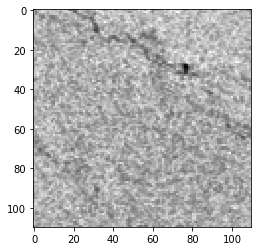

[ 0. nan nan nan]


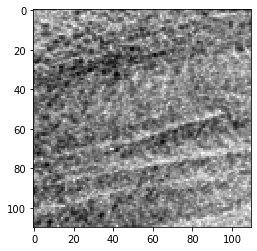

[ 0. nan nan nan]


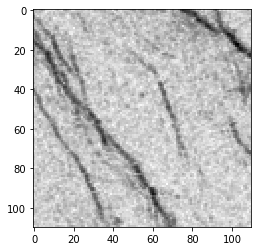

[ 0. nan nan nan]


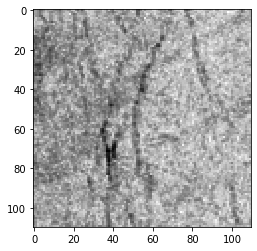

In [8]:
show_images(data=train_data, labels=train_labels, indexes=10)

In [9]:
train_data_test = train_data.values.reshape(len(train_data),110,110,1)
valid_data_test = valid_data.values.reshape(len(valid_data),110,110,1)
test_data_test = test_data.values.reshape(len(test_data),110,110,1)


(5151, 12100)


In [10]:
# Augment data using own function  for roatation etc

def preprocess(image):
    import random
    # get random true false for vertical or horizontal flip
    vertical_q = bool(random.getrandbits(1))
    
    if vertical_q == True:
        aug_image = tf.image.random_flip_up_down(image)
    elif vertical_q == False:
        aug_image = tf.image.random_flip_left_right(image)
    else:
        aug_image = image 
    
    aug_image = tf.image.random_contrast(aug_image, 0.2, 0.5)    
    
    return aug_image

train_data_extended = np.repeat(train_data_test, 3, axis=0)

# get shuffled indices
shuffle_indices = np.random.permutation(train_data_extended.shape[0])

train_data_extended = train_data_extended[shuffle_indices]
# n_volc_train_augmented = n_volc_train_augmented[shuffle_indices]
train_data_augmented = np.empty(train_data_extended.shape)

for i,image in enumerate(train_data_extended):
    train_data_augmented[i] = preprocess(image)

In [11]:
# first just train on whether there is a volcano or not

train_labels_volcano_present =  train_labels['Volcano?'].values.reshape(-1, 1)
valid_labels_volcano_present =  valid_labels['Volcano?'].values.reshape(-1, 1)
test_labels_volcano_present =  test_labels['Volcano?'].values.reshape(-1, 1)

onehot = OneHotEncoder(sparse=False)
onehot.fit(train_labels_volcano_present)


OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [12]:
print(onehot.categories_)

train_labels_volcano_present = onehot.transform(train_labels_volcano_present)
valid_labels_volcano_present = onehot.transform(valid_labels_volcano_present)
test_labels_volcano_present = onehot.transform(test_labels_volcano_present)

[array([0, 1])]


In [13]:
train_labels_v_present_augmented = np.repeat(train_labels_volcano_present, 3, axis=0)
train_labels_v_present_augmented = train_labels_v_present_augmented[shuffle_indices]


## Attempt 1

- Convolutional NN with a mix of conv and max pooling layers with ReLU activation function and a dense NN at the end with a softmax activation function. 
- There are multiple convolutional layers between each max pooling. In theory the second layer should be able to extract more complex patterns using the simple patterns picked up by the previous convolutional layer. 
- Dropout is used in the dense NN to avoid overfitting. This is where random neurons are turned off during training to ensure the output is not reliant on a select few neurons. 
- I will augment the data once I am happy the model is running properly. 

In [14]:


model = keras.models.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=7, input_shape=[110, 110, 1],
                  activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=8,kernel_size=3, activation='relu', 
                  padding="SAME"),
    keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu', 
                  padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', 
                  padding="SAME"),
    keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', 
                  padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=2, activation='softmax'),
])

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 8)       400       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 8)         584       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        2

In [16]:
# metrics for precision and recall seem to have some bugs so need to define our own metrics here

# honestly just taken from a github forum but commented
# so i know whats going on
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [17]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', recall, precision])


In [31]:
# train the model!

# define steps per epoch
steps_per_epoch = int( np.ceil(train_data_augmented.shape[0] / batch_size) )

# uncomment this if you want to retrain the model
# history = model.fit(train_data_augmented, train_labels_v_present_augmented, 
#                     epochs=10, batch_size=64, steps_per_epoch=steps_per_epoch,
#                     validation_data=(valid_data_test, valid_labels_volcano_present))

# I have a pretrained model ready so you dont have to do this again


In [19]:
## Great! Now save the model so you dont have to train it again...

# uncomment this if you want to save the model
# model.save("Classify_Volcano_Binary.h5")


model = keras.models.load_model("Classify_Volcano_Binary.h5", custom_objects={"recall":recall, "precision":precision})

In [20]:
# plot loss, accuracy and validation acc/loss

# plt.style.use('fivethirtyeight')
# pd.DataFrame(history.history).plot(figsize=(8, 5)) 
# plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
# plt.xlabel('Epoch')
# plt.ylabel('Measurement parameter')
# plt.show()

In [21]:
# evaluate the model against the test set

model.evaluate(test_data_test, test_labels_volcano_present)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

[0.693963885307312, 0.9546452164649963, 0.9549418687820435, 0.9549418687820435]

## Training to identify the number of volcanoes too

- I am going to treat this as a classification task in a similar way to the above.
    
## How

- Unlike the simple sequential models which only allow one output layer, the function api will allow different putpit layers with their own losses etc. 
- Process the columns using one hot encoding again. 



In [22]:
# make label files

train_labels['Number Volcanoes'] = train_labels['Number Volcanoes'].fillna(0)
valid_labels['Number Volcanoes'] = valid_labels['Number Volcanoes'].fillna(0)
test_labels['Number Volcanoes'] = test_labels['Number Volcanoes'].fillna(0)

## Ok, I'm going to try and treat this as a classification task

n_volc_train = train_labels['Number Volcanoes'].values.reshape(-1,1)
n_volc_valid = valid_labels['Number Volcanoes'].values.reshape(-1,1)
n_volc_test = test_labels['Number Volcanoes'].values.reshape(-1,1)


/opt/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
n_volc_train_augmented = np.repeat(n_volc_train, 3, axis=0)


# get shuffled indices
n_volc_train_augmented = n_volc_train_augmented[shuffle_indices]

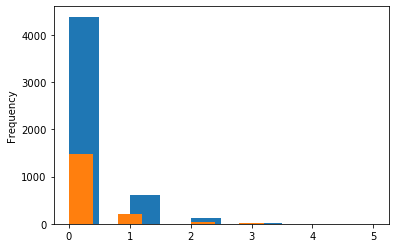

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

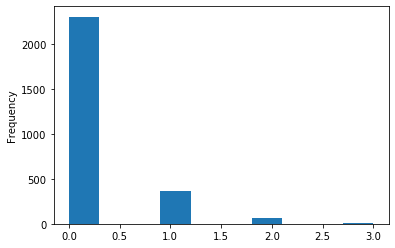

In [24]:
# get an idea of the distribution of the values for 'number of volcanoes'

train_labels['Number Volcanoes'].plot(kind='hist')
valid_labels['Number Volcanoes'].plot(kind='hist')
plt.show()
test_labels['Number Volcanoes'].plot(kind='hist')

ohe = OneHotEncoder(sparse=False)
ohe.fit(n_volc_train)

In [25]:
# encode the number of volcanoes classes

# print(ohe.categories_)

# n_volc_train = ohe.transform(n_volc_train)
# n_volc_valid = ohe.transform(n_volc_valid)
# n_volc_test = ohe.transform(n_volc_test)

# print(n_volc_train.shape)
# print(n_volc_valid.shape)

In [26]:

# use the pretrained model which tried to classify if there was a volcano or not
model = keras.models.load_model("Classify_Volcano_Binary.h5", custom_objects={"recall":recall, "precision":precision})

base_model = model.layers[:-1]
print(base_model[-1].output)

for layer in base_model:
    layer.trainable = False
    
# create new output layers
class_out = model.layers[-1](base_model[-1].output)
reg_out = keras.layers.Dense(1)(base_model[-1].output)

# create new model
new_model = keras.Model(inputs = model.input,
                        outputs=[class_out, reg_out])

Tensor("dropout/cond_2/Identity:0", shape=(None, 128), dtype=float32)


In [27]:
new_model.compile(loss=["binary_crossentropy", "mse"], loss_weights=[0.5, 0.5],
                  optimizer='adam', metrics=["accuracy", "mse"])


In [28]:
for layer in new_model.layers[:-2]:
    layer.trainable=False
    
new_model.compile(loss=["binary_crossentropy", "mse"], 
                  loss_weights=[0.5, 0.5],
                  optimizer='adam', metrics=["accuracy", "mse"])

In [32]:
new_history = new_model.fit(train_data_augmented, [train_labels_v_present_augmented, n_volc_train_augmented],
                            epochs=10, batch_size=64, steps_per_epoch=steps_per_epoch,
                            validation_data=(valid_data_test, [valid_labels_volcano_present, n_volc_valid]))

Epoch 1/10
242/242 [==============================] - ETA: 0s - loss: 0.1916 - dense_1_loss: 0.1605 - dense_2_loss: 0.2228 - dense_1_accuracy: 0.9473 - dense_1_mse: 0.0425 - dense_2_accuracy: 0.8697 - dense_2_mse: 0.2228WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x13dc507a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [===

In [33]:
## Ok so using the old layers seems to work well (even on the valid dataset)
# unfreeze layers and train it more
for layer in new_model.layers[:-2]:
    layer.trainable=True
new_model.compile(loss=["binary_crossentropy", "mse"], 
                  loss_weights=[0.5, 0.5],
                  optimizer='adam', metrics=["accuracy", 'mse'])


In [35]:
new_history = new_model.fit(train_data_test, [train_labels_volcano_present, n_volc_train],
                            epochs=10, batch_size=64, steps_per_epoch=steps_per_epoch,
                            validation_data=(valid_data_test, [valid_labels_volcano_present, n_volc_valid]))

Epoch 1/10
242/242 [==============================] - ETA: 0s - loss: 0.1046 - dense_1_loss: 0.0914 - dense_2_loss: 0.1178 - dense_1_accuracy: 0.9694 - dense_1_mse: 0.0238 - dense_2_accuracy: 0.9399 - dense_2_mse: 0.1178WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1476ce7a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
242/242 [===

In [36]:
# ok save this model! 
new_model.save("Classify_Volcano_Number_Volcanoes.h5")

# new_model = keras.models.load_model("Classify_Volcano_Number_Volcanoes.h5")


In [37]:
new_model.evaluate(test_data_test, [test_labels_volcano_present, n_volc_test])

86/86 [==============================] - 6s 69ms/step - loss: 5588.3960 - dense_1_loss: 0.6983 - dense_2_loss: 11176.0918 - dense_1_accuracy: 0.9532 - dense_1_mse: 0.0467 - dense_2_accuracy: 0.8595 - dense_2_mse: 11176.0918


[5588.39599609375,
 0.6983168721199036,
 11176.091796875,
 0.9531821608543396,
 0.04666513204574585,
 0.859546422958374,
 11176.091796875]

## Thoughts

- Despite doing very well on the validation set, the model has performed ok on the test set. Unfortunately, the mse for identifying the number of volcanoes is massive! Clearly overtraining on the training set. Need to inspect the test set to see if it is similar or representative. 
- For now, I feel I have showcased I can train a CNN, augment/preprocess data, save a tf model, load a pretrained model and reuse the layers, create a neural network to both classify an image and return additional information about the image.